In [3]:
import pandas as pd
!pip install wget
import wget
import numpy as np
from tqdm.notebook import tqdm
from astropy.io import fits
from astropy.table import Table
import csv
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


# IMPORT PLATE NAMES

In [4]:
#In this notebook we preprocess the optical data
df = fits.open('ssppOut-dr12.fits')
df.info()

Filename: ssppOut-dr12.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    495   1843200R x 239C   [22A, 19A, 19A, 19A, 22A, J, J, J, J, J, D, D, J, J, K, K, 3A, 23A, 16A, 16A, 3A, A, 3A, J, I, I, 13A, 4A, 20A, 5A, E, I, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, I, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, I, I, I, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, I, I, I, I, I, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, D, D, D, D, E, I, E, E, I, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 6A, E, E, J, 6A, J, J, J, J, J, J, 4A, E, 2A, E, I, E, E, I, E, E, I, E, E, I, E, E, I, E]   


In [6]:
df = Table.read('ssppOut-dr12.fits',1)
df = df[df['FLAG'] == 'nnnnn'] #The objects that fulfill this condition are stars
df[0]

<Row index=0>
      SPECOBJID              PLATEID            BESTOBJID           FLUXOBJID           TARGETOBJID       SPECPRIMARY SPECLEGACY SPECSEGUE SPECSEGUE1 SPECSEGUE2  PLUG_RA    PLUG_DEC  LEGACY_TARGET1 LEGACY_TARGET2 SPECIAL_TARGET1 SPECIAL_TARGET2 FIRSTRELEASE       PROGRAMNAME            CHUNK           PLATERUN     RUNSSPP RUN1D  RUN2D   MJD  PLATE FIBER  PRIM_TARGET  SPECTYPE_HAMMER  SPECTYPE_SUBCLASS    FLAG  TEFF_ADOP TEFF_ADOP_N TEFF_ADOP_UNC TEFF_HA24 TEFF_HD24 TEFF_TK  TEFF_TG   TEFF_TI  TEFF_NGS1 TEFF_ANNSR TEFF_ANNRR  TEFF_WBG  TEFF_K24 TEFF_KI13 TEFF_HA24_IND TEFF_HD24_IND TEFF_TK_IND TEFF_TG_IND TEFF_TI_IND TEFF_NGS1_IND TEFF_ANNSR_IND TEFF_ANNRR_IND TEFF_WBG_IND TEFF_K24_IND TEFF_KI13_IND TEFF_HA24_UNC TEFF_HD24_UNC TEFF_TK_UNC TEFF_TG_UNC TEFF_TI_UNC TEFF_NGS1_UNC TEFF_ANNSR_UNC TEFF_ANNRR_UNC TEFF_WBG_UNC TEFF_K24_UNC TEFF_KI13_UNC LOGG_ADOP LOGG_ADOP_N LOGG_ADOP_UNC LOGG_NGS2 LOGG_NGS1 LOGG_ANNSR LOGG_ANNRR LOGG_CAI1 LOGG_CAI2 LOGG_MGH  LOGG_WBG  LOGG_K24 LOGG_KI13 LOGG_NGS2_IND LOGG_NGS1_IND LOGG_ANNSR_IND LOGG_ANNRR_IND LOGG_CAI1_IND LOGG_CAI2_IND LOGG_MGH_IND LOGG_WBG_IND LOGG_K24_IND LOGG_KI13_IND LOGG_NGS2_UNC LOGG_NGS1_UNC LOGG_ANNSR_UNC LOGG_ANNRR_UNC LOGG_CAI1_UNC LOGG_CAI2_UNC LOGG_MGH_UNC LOGG_WBG_UNC LOGG_K24_UNC LOGG_KI13_UNC  FEH_ADOP  FEH_ADOP_N FEH_ADOP_UNC  FEH_NGS2    FEH_NGS1   FEH_ANNSR  FEH_ANNRR  FEH_CAIIK1 FEH_CAIIK2 FEH_CAIIK3 FEH_ACF FEH_CAIIT  FEH_WBG    FEH_K24    FEH_KI13  FEH_NGS2_IND FEH_NGS1_IND FEH_ANNSR_IND FEH_ANNRR_IND FEH_CAIIK1_IND FEH_CAIIK2_IND FEH_CAIIK3_IND FEH_ACF_IND FEH_CAIIT_IND FEH_WBG_IND FEH_K24_IND FEH_KI13_IND FEH_NGS2_UNC FEH_NGS1_UNC FEH_ANNSR_UNC FEH_ANNRR_UNC FEH_CAIIK1_UNC FEH_CAIIK2_UNC FEH_CAIIK3_UNC FEH_ACF_UNC FEH_CAIIT_UNC FEH_WBG_UNC FEH_K24_UNC FEH_KI13_UNC   AFE   AFE_IND AFE_UNC DIST_DWARF  DIST_TO  DIST_GIANT  DIST_AGB  DIST_FHB DIST_AP  DIST_Z RV_FLAG  RV_ADOP  RV_ADOP_UNC   RV_CAL  RV_CAL_UNC  RV_BS   RV_BS_UNC RV_ELODIE RV_ELODIE_UNC  RV_GSR RV_GSR_UNC   V_MAG       BV     BV_BALMER  GR_PREDICT   GR_HA24     GR_HD24      GR_HP     G_MAG       UG         GR          RI           IZ     U_MAG_UNC   G_MAG_UNC   R_MAG_UNC   I_MAG_UNC   Z_MAG_UNC      EBV        SNR      QA   CC_CAHK    CC_MGH       RA        DEC             L                 B         TEFF_SPEC TEFF_SPEC_N TEFF_SPEC_UNC LOGG_SPEC LOGG_SPEC_N LOGG_SPEC_UNC  FEH_SPEC  FEH_SPEC_N FEH_SPEC_UNC TEFF_COL TEFF_COL_UNC FEH_TFIX_NGS2 FEH_TFIX_NGS1 LOGG_TFIX_NGS2 LOGG_TFIX_NGS1 FEH_TFIX_NGS2_UNC FEH_TFIX_NGS1_UNC LOGG_TFIX_NGS2_UNC LOGG_TFIX_NGS1_UNC FEH_TFIX_CAIIK1 FEH_TFIX_CAIIK1_UNC   ACF1   ACF1_SNR   ACF2   ACF2_SNR INSPECT ELODIERVFINAL ELODIERVFINALERR ZWARNING SURVEY PRIMTARGET SECTARGET SEGUE1_TARGET1 SEGUE1_TARGET2 SEGUE2_TARGET1 SEGUE2_TARGET2 L_CLASS DIST_ADOP MP_FLAG TEFF_IRFM TEFF_IRFM_IND TEFF_IRFM_UNC LOGG_NGS1_IRFM LOGG_NGS1_IRFM_IND LOGG_NGS1_IRFM_UNC FEH_NGS1_IRFM FEH_NGS1_IRFM_IND FEH_NGS1_IRFM_UNC LOGG_CAI1_IRFM LOGG_CAI1_IRFM_IND LOGG_CAI1_IRFM_UNC FEH_CAIIK1_IRFM FEH_CAIIK1_IRFM_IND FEH_CAIIK1_IRFM_UNC
       bytes22               bytes19             bytes19             bytes19              bytes22            int32      int32      int32     int32      int32     float64    float64       int32          int32           int64           int64         bytes3            bytes23             bytes16          bytes16       bytes3 bytes1 bytes3 int32 int16 int16    bytes13         bytes4           bytes20        bytes5  float32     int16       float32     float32   float32  float32  float32   float32   float32   float32    float32    float32   float32   float32      int16         int16        int16       int16       int16        int16         int16          int16         int16        int16         int16        float32       float32      float32     float32     float32      float32       float32        float32       float32      float32       float32     float32     int16       float32     float32   float32   float32    float32    float32   float32  float32   float32   f

In [7]:
#We are going to download the spectra here:
save_path = 'Downloaded_opt/'

# DOWNLOAD SPECTRA

In [10]:
#This blocks allows to build individual urls

i=32

SURVEY = str(df[i]['SURVEY'])
PLATE4 = str(df[i]['PLATE'])
MJD = str(df[i]['MJD'])
FIBERID4 =  str(df[i]['FIBER'])
while len(FIBERID4) <4:
    FIBERID4 = '0' + FIBERID4
while len(PLATE4) <4:
    PLATE4 = '0' + PLATE4
RUN2D = str(int(df[i]['RUN2D']))


url = 'https://data.sdss.org/sas/dr16/sdss/spectro/redux/'+RUN2D+'/spectra/lite/'+PLATE4+'/spec-'+PLATE4+'-'+MJD+'-'+FIBERID4+'.fits'

print(url)

https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/0266/spec-0266-51630-0049.fits


In [8]:
#This block downloads the spectra automatically

used_plates = []
error_plates = []
counter = 0
k=0

for i in tqdm(range(0,50000)):
    

    SURVEY = str(df[i]['SURVEY'])
    PLATE4 = str(df[i]['PLATE'])
    MJD = str(df[i]['MJD'])
    FIBERID4 =  str(df[i]['FIBER'])
    while len(FIBERID4) <4:
        FIBERID4 = '0' + FIBERID4
    while len(PLATE4) <4:
        PLATE4 = '0' + PLATE4
    RUN2D = str(int(df[i]['RUN2D']))


    url = 'https://data.sdss.org/sas/dr16/sdss/spectro/redux/'+RUN2D+'/spectra/lite/'+PLATE4+'/spec-'+PLATE4+'-'+MJD+'-'+FIBERID4+'.fits'


    try:
        wget.download(url, out = save_path)
        used_plates.append(i)
        counter = counter+1
        print('SUCCESS')

    except:

        error_plates.append(i)
        print('ERROR')


    if counter > 1000:  

        np.save(save_path+'used_plates{}'.format(k), used_plates) 
        np.save(save_path+'error_plates{}'.format(k), error_plates)
        k = k+1
                       
np.save(save_path+'used_plates{}'.format(k), used_plates) 
np.save(save_path+'error_plates{}'.format(k), error_plates)
    


SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# VISUALIZE DATA

In [ ]:
file =  save_path + 'spec-0266-51602-0014.fits'

In [ ]:
data = fits.open(file)
data.info()

In [ ]:
data = Table.read(file,1)
data

In [ ]:
flux = data[:]['flux']   # Flujo energético recibido
wave = data[:]['loglam'] # Logaritmo de la longitud de onda
plt.plot(wave,flux)
plt.ylabel('Flux')
plt.xlabel('Wavelength [log]')
plt.show()

# FROM DOWNLOADED TO .csv

In [6]:
#We want to save the wavelengths of each channel in the header of the final .csv file

row = 0

SURVEY = str(df[row]['SURVEY'])
PLATE4 = str(df[row]['PLATE'])
MJD = str(df[row]['MJD'])
FIBERID4 =  str(df[row]['FIBER'])
while len(FIBERID4) <4:
    FIBERID4 = '0' + FIBERID4
while len(PLATE4) <4:
    PLATE4 = '0' + PLATE4
RUN2D = str(int(df[row]['RUN2D']))

ID = str(int(df[row]["SPECOBJID"]))
FeH = str(df[row]["FEH_SPEC"])
TEff = str(df[row]["TEFF_SPEC"])
SpType = str(df[row]["SPECTYPE_SUBCLASS"])
LogG = str(df[row]["LOGG_SPEC"])
print([ID,FeH,TEff,SpType,LogG])
    
file =  save_path + 'spec-'+PLATE4+'-'+MJD+'-'+FIBERID4+'.fits'
print(file)

events = Table.read(file, hdu=1)
wave = events[:]['loglam'].data # Logaritmo de la longitud de onda
        
wave_min = int(np.where(wave ==  3.636)[0][0])
wave_max = int(np.where(wave == 3.648)[0][0])
    
wave = wave[wave_min:wave_max]
compressed_wave = wave

#compressed_wave = []
#number_compressed_entries = len(wave)//3

#for i in range(number_compressed_entries):
    #compressed_wave.append(float(wave[3*(i + 1) - 2]))

['299493250387961856', '-1.1141464', '8123.495', 'A0                  ', '4.2318993']
Downloaded_opt/spec-0266-51602-0014.fits


In [ ]:
#Write .csv file
first_index = 0
last_index = 50000

with open('data_opt_Feline.csv', 'w', newline='') as file:
  
    writer = csv.writer(file)
    writer.writerow(np.concatenate((np.asarray(["ID", "Fe/H", "T", "Spec_Type", "logG"]), np.asarray(compressed_wave))))
  
    for row in tqdm(range(first_index,last_index)): 

        SURVEY = str(df[row]['SURVEY'])
        PLATE4 = str(df[row]['PLATE'])
        MJD = str(df[row]['MJD'])
        FIBERID4 =  str(df[row]['FIBER'])
        while len(FIBERID4) <4:
            FIBERID4 = '0' + FIBERID4
        while len(PLATE4) <4:
            PLATE4 = '0' + PLATE4
        RUN2D = str(int(df[row]['RUN2D']))

        file =  save_path + 'spec-'+PLATE4+'-'+MJD+'-'+FIBERID4+'.fits'
        
        try:

            events = Table.read(file, hdu=1)
            flux = events[:]['flux'].data.astype(str)   # Flujo energético recibido
            wave = events[:]['loglam'].data # Logaritmo de la longitud de onda

            wave_min = int(np.where(wave ==  3.636)[0][0])
            wave_max = int(np.where(wave == 3.648)[0][0])

            wave = wave[wave_min:wave_max]
            flux = flux[wave_min:wave_max]
            
            compressed_flux = flux

            #compressed_flux = []
            #number_compressed_entries = len(flux)//3

            #for i in range(number_compressed_entries):
             #   total_sum = (float(flux[3*(i + 1) - 3]) + float(flux[3*(i + 1) - 2]) + float(flux[3*(i + 1) - 1]))
             #   average = total_sum/3
             #   compressed_flux.append(average)
            
            
            ID = str(int(df[row]["SPECOBJID"]))
            FeH = str(df[row]["FEH_SPEC"])
            TEff = str(df[row]["TEFF_SPEC"])
            SpType = str(df[row]["SPECTYPE_SUBCLASS"])
            LogG = str(df[row]["LOGG_SPEC"])
            print([ID,FeH,TEff,SpType,LogG])


            array_to_save = np.concatenate((np.asarray([ID, FeH, TEff, SpType, LogG]), np.asarray(compressed_flux)))
            writer.writerow(array_to_save)
            
        except:
            print('ERROR')
            continue
      

['299493250387961856', '-1.1141464', '8123.495', 'A0                  ', '4.2318993']
['299497098678659072', '0.022924505', '6082.7534', 'F2                  ', '3.8115547']
['299498198190286848', '-0.9566719', '5824.996', 'G2                  ', '3.7622445']
['299500672091449344', '-0.086239725', '6894.1313', 'F5                  ', '4.00297']
['299501771603077120', '-2.075622', '6292.163', 'F5                  ', '3.6427238']
['299512491841447936', '-0.74006337', '7422.5063', 'A0                  ', '4.1031055']
['299523761835632640', '-1.9853107', '8474.465', 'A0                  ', '3.4346843']
['299527610126329856', '-0.8241791', '6023.8916', 'F5                  ', '3.9810982']
['299539154998421504', '-0.8344723', '5548.8535', 'F9                  ', '4.346533']
['299539429876328448', '-1.1738511', '7321.405', 'A0                  ', '3.5996168']
['299551249626327040', '-0.46428812', '7786.586', 'A0                  ', '4.22449']
['299552349137954816', '-0.5656555', '5985.7285', 

# EDA AND PREPROCESSING

In [ ]:
data = pd.read_csv('data_opt.csv',header = 0)
data.head()

Study correlation between the minimum of the spectra and the label for metallicity (to use on data_opt_Feline.csv):

In [ ]:
data = pd.read_csv('data_opt_Feline.csv',header = 0)
data.head()

In [71]:
minimo = []
for i in range(len(df)):
    minimo.append(np.min(df.iloc[i][6:]))
    if np.min(df.iloc[i][6:]) < 0:
        print(i)

In [72]:
np.corrcoef(df['Fe/H'],minimo)

array([[ 1.        , -0.08694103],
       [-0.08694103,  1.        ]])

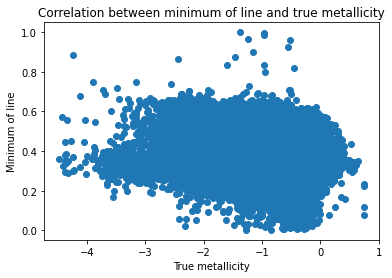

In [73]:
plt.scatter(df['Fe/H'],minimo)
#plt.xlim([-5,2])
#plt.ylim([-1,1.2])
plt.ylabel('Minimum of line')
plt.xlabel('True metallicity')
plt.title('Correlation between minimum of line and true metallicity')
plt.show()

Remove zeros:

In [77]:
estadisticas = df.describe()
estadisticas
est_tras = estadisticas.T

In [78]:
boss = est_tras[est_tras['mean']==0]
boss.index

Index([], dtype='object')

In [79]:
df_1 = df
df_1 = df_1.drop(columns=boss.index,axis=0)
df_1.head()

ID      Fe/H          T             Spec_Type      logG  \
0  299493250387961856 -1.114146  8123.4950  A0                    4.231899   
1  299497098678659072  0.022925  6082.7534  F2                    3.811555   
2  299498198190286848 -0.956672  5824.9960  G2                    3.762244   
3  299500672091449344 -0.086240  6894.1313  F5                    4.002970   
4  299501771603077120 -2.075622  6292.1630  F5                    3.642724   

   3.600100040435791  3.600399971008301  3.6006999015808105  \
0          28.681675          27.544079           32.643401   
1         159.119627         148.541097          163.284257   
2          62.663019          61.610858           60.614534   
3         860.851803         855.883033          854.947767   
4         192.110557         197.566483          202.960473   

   3.6010000705718994  3.601300001144409  ...  3.8970999717712402  \
0           34.306520          35.861777  ...           11.016165   
1          170.678757         174.912947  ...           48.442642   
2           62.935831          67.179302  ...           66.840328   
3          917.197900         945.410300  ...          370.979347   
4          206.209320         204.860247  ...          108.824532   

   3.89739990234375  3.897700071334839  3.8980000019073486  \
0         11.423922          11.673958           11.648906   
1         46.553832          46.084943           47.978958   
2         63.305913          63.293772           64.315673   
3        366.566400         366.415623          370.814900   
4        109.417340         109.897970          108.649061   

   3.8982999324798584  3.8986001014709473  3.898900032043457  \
0           11.482885            8.409131          12.184230   
1           45.912667           45.754645          45.760544   
2           63.262847           65.396211          64.686073   
3          369.189397          369.392130         368.786593   
4          106.636764          107.281770         108.192732   

   3.899199962615967  3.8994998931884766  3.8998000621795654  
0          10.659391           10.714479           11.395344  
1          44.252884           44.928998           45.911883  
2          63.495898           62.604314           62.562087  
3         368.962880          360.742227          368.933923  
4         110.016413          106.766272          107.954033  

[5 rows x 1005 columns]

Normalize fluxes by rows, remove objects with negative fluxes as that is non-physical:

In [80]:
index_list = []
for row in tqdm(range(df_1.shape[0])):
    maximo = np.max(df_1.iloc[row][5:])
    minimo = np.min(df_1.iloc[row][5:])
    if minimo < 0:
        index_list.append(row)
    for column in range(5,df_1.shape[1]):
        df_1.iat[row,column] = df_1.iat[row,column]/maximo
df_1 = df_1.drop(index = index_list,axis=0)

Remove outliers:

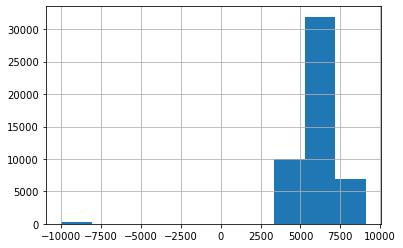

In [84]:
df_1['T'].hist()

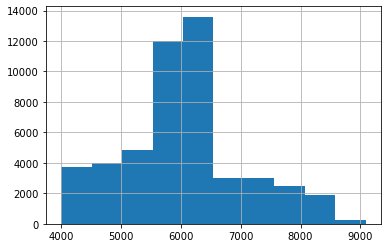

In [85]:
df_1 = df_1[df_1['T']>0]
df_1.head()
df_1['T'].hist()

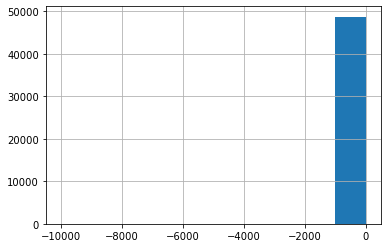

In [86]:
df_1['Fe/H'].hist()

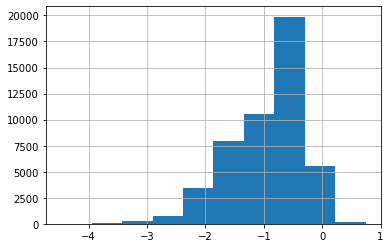

In [87]:
df_1 = df_1[df_1['Fe/H'] > -2000]
df_1['Fe/H'].hist()

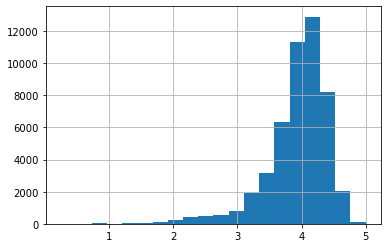

In [88]:
df_1['logG'].hist(bins=20)

In [89]:
tipo_esp = df_1[df_1['logG'] <0]['Spec_Type']
tipo_esp

Series([], Name: Spec_Type, dtype: object)

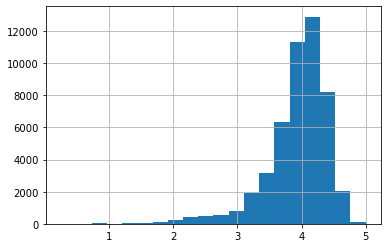

In [90]:
df_1 = df_1[df_1['logG'] > -2000]
df_1['logG'].hist(bins=20)

In [91]:
#Save clean .csv file
df_1.to_csv('data_opt_clean.csv')

Explore statistics:

In [92]:
df.isnull().sum()

ID                    0
Fe/H                  0
T                     0
Spec_Type             0
logG                  0
                     ..
3.8986001014709473    0
3.898900032043457     0
3.899199962615967     0
3.8994998931884766    0
3.8998000621795654    0
Length: 1005, dtype: int64

In [93]:
df.describe()

ID          Fe/H             T          logG  \
count  4.994100e+04  49941.000000  49941.000000  49941.000000   
mean   9.522351e+17    -56.203662   5951.820862      0.529353   
std    3.544278e+17    741.211882   1547.515809    184.525001   
min    2.994933e+17  -9999.000000  -9999.000000  -9999.000000   
25%    6.372657e+17     -1.372770   5464.182600      3.748979   
50%    1.035968e+18     -0.786579   6025.421000      4.028748   
75%    1.267926e+18     -0.494113   6425.538600      4.249121   
max    1.473899e+18      0.745000   9088.135000      5.000000   

       3.600100040435791  3.600399971008301  3.6006999015808105  \
count       49941.000000       49941.000000        49941.000000   
mean           68.695040          69.454118           71.655951   
std            92.666660          93.803981           96.905671   
min            -1.545550          -1.614840           -2.753003   
25%            17.879289          18.037894           18.785886   
50%            38.388798          38.720061           40.067393   
75%            89.334630          89.965033           92.346393   
max          3078.722567        2974.384667         3019.460800   

       3.6010000705718994  3.601300001144409  3.601599931716919  ...  \
count        49941.000000       49941.000000       49941.000000  ...   
mean            74.258655          76.439311          75.227081  ...   
std            101.068534         104.049280         102.876073  ...   
min             -1.520465          -1.019188          -1.860504  ...   
25%             19.310114          19.991184          19.560092  ...   
50%             41.553240          42.983276          42.050701  ...   
75%             95.465877          97.592988          96.041910  ...   
max           3248.597000        3320.645000        3221.817967  ...   

       3.8970999717712402  3.89739990234375  3.897700071334839  \
count        49941.000000      49941.000000       49941.000000   
mean            48.466403         47.718894          47.963935   
std             80.775945         79.561032          79.433147   
min              0.758500          0.753905           0.741324   
25%             15.053056         14.795699          14.887681   
50%             32.005632         31.523407          31.737842   
75%             63.317045         62.339466          62.585654   
max          10640.319000      10419.924333       10344.450000   

       3.8980000019073486  3.8982999324798584  3.8986001014709473  \
count        49941.000000        49941.000000        49941.000000   
mean            48.084300           47.955717           47.823991   
std             79.844063           78.946931           79.141505   
min              0.738956           -5.219581           -0.510888   
25%             14.929098           15.001812           14.921200   
50%             31.736205           31.795794           31.698594   
75%             62.734604           62.578721           62.592473   
max          10429.112667        10263.377333        10267.697333   

       3.898900032043457  3.899199962615967  3.8994998931884766  \
count       49941.000000       49941.000000        49941.000000   
mean           47.709465          47.466575           47.197762   
std            79.121496          78.490724           77.378129   
min             0.681698           0.736505            0.822176   
25%            14.872077          14.763562           14.755661   
50%            31.619090          31.368229           31.311322   
75%            62.318105          62.022918           61.726766   
max         10331.634000       10216.575000         9991.535667   

       3.8998000621795654  
count        49941.000000  
mean            47.092197  
std             77.092447  
min              0.635828  
25%             14.694486  
50%             31.215266  
75%             61.570624  
max           9927.433000  

[8 rows x 1004 columns]

In [94]:
etiquetas =pd.DataFrame(data=df,columns=['T','Fe/H','Spec_Type','logG'])
etiquetas

T      Fe/H             Spec_Type      logG
0      8123.4950 -1.114146  A0                    4.231899
1      6082.7534  0.022925  F2                    3.811555
2      5824.9960 -0.956672  G2                    3.762244
3      6894.1313 -0.086240  F5                    4.002970
4      6292.1630 -2.075622  F5                    3.642724
...          ...       ...                   ...       ...
49936  6119.5760 -1.015755  F5                    3.948520
49937  6091.2720 -2.326460  F5                    4.128350
49938  7797.6750 -1.292243  A0                    4.118305
49939  6315.4590 -1.548262  F5                    3.887996
49940  5514.6387 -0.772620  F9                    4.450448

[49941 rows x 4 columns]

In [95]:
etiquetas['Spec'] = etiquetas ['Spec_Type'].astype(str).str[0]
etiquetas.drop(['Spec_Type'],axis=1,inplace=True)
etiquetas

T      Fe/H      logG Spec
0      8123.4950 -1.114146  4.231899    A
1      6082.7534  0.022925  3.811555    F
2      5824.9960 -0.956672  3.762244    G
3      6894.1313 -0.086240  4.002970    F
4      6292.1630 -2.075622  3.642724    F
...          ...       ...       ...  ...
49936  6119.5760 -1.015755  3.948520    F
49937  6091.2720 -2.326460  4.128350    F
49938  7797.6750 -1.292243  4.118305    A
49939  6315.4590 -1.548262  3.887996    F
49940  5514.6387 -0.772620  4.450448    F

[49941 rows x 4 columns]

In [96]:
etiquetas['Spec'].value_counts()

F    22817
A    11174
K    10159
G     4761
W      469
M      342
C       86
0       78
S       30
B       19
L        3
O        3
Name: Spec, dtype: int64

In [97]:
etiquetas=etiquetas.drop(etiquetas[etiquetas['Spec']=='u'].index)
etiquetas=etiquetas.drop(etiquetas[etiquetas['Spec']=='s'].index)
etiquetas=etiquetas.drop(etiquetas[etiquetas['Spec']=='0'].index)
etiquetas

T      Fe/H      logG Spec
0      8123.4950 -1.114146  4.231899    A
1      6082.7534  0.022925  3.811555    F
2      5824.9960 -0.956672  3.762244    G
3      6894.1313 -0.086240  4.002970    F
4      6292.1630 -2.075622  3.642724    F
...          ...       ...       ...  ...
49936  6119.5760 -1.015755  3.948520    F
49937  6091.2720 -2.326460  4.128350    F
49938  7797.6750 -1.292243  4.118305    A
49939  6315.4590 -1.548262  3.887996    F
49940  5514.6387 -0.772620  4.450448    F

[49863 rows x 4 columns]

In [98]:
etiquetas['Spec'].value_counts()

F    22817
A    11174
K    10159
G     4761
W      469
M      342
C       86
S       30
B       19
L        3
O        3
Name: Spec, dtype: int64

<Figure size 3600x3600 with 0 Axes>

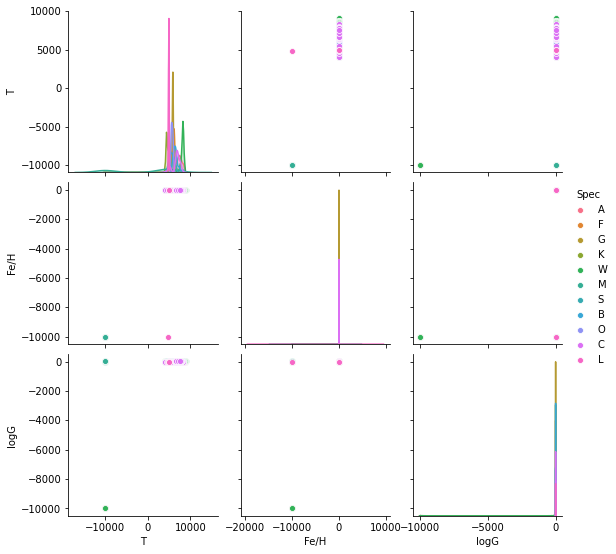

In [99]:
plt.figure(figsize=(50, 50))
sns.pairplot(etiquetas,vars=['T','Fe/H','logG'],hue='Spec')

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

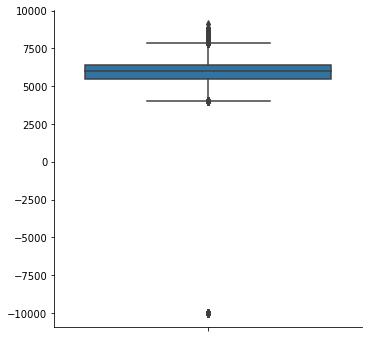

In [100]:
sns.catplot(data=df, y = df['T'], kind = 'box')

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

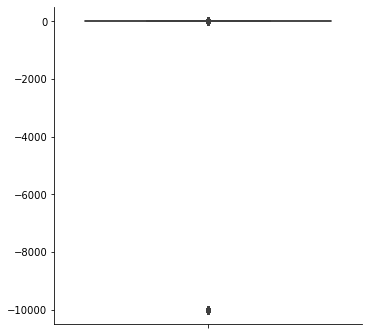

In [101]:
sns.catplot(data=df, y = df['Fe/H'], kind = 'box')

In [ ]:
dfdummies= pd.get_dummies(etiquetas)
dfdummies

In [ ]:
correlation = dfdummies[dfdummies['Spec_B']==1].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)